In [1]:
%matplotlib nbagg
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import glob
import math

In [2]:
class SymmetryFunctionData:
    def __init__(self):
        self.parameters = {}
        self.radial = []
        self.angular = []

def readSymmetryFunction(file_name):
    sfd = SymmetryFunctionData()
    f = open(file_name, "r")
    for line in f:
        split_line = line.split()
        if split_line[0] == "#SFINFO":
            sfd.parameters[split_line[1]] = split_line[2]
        elif split_line[0][0] == "#":
            continue
        else:
            sfd.radial.append([float(split_line[0]),
                               float(split_line[1])])
            sfd.angular.append([float(split_line[2]),
                                float(split_line[3])])
    f.close()
    sfd.radial = np.array(sfd.radial).T
    return sfd

In [3]:
symmetry_functions = []
for file_name in sorted(glob.glob("sf.*.out")):
    symmetry_functions.append(readSymmetryFunction(file_name))

In [4]:
elements = ["H", "O"]
element_combinations = [[elements[i], elements[j]] for i in range(len(elements)) for j in range(len(elements)) if i <= j]
element_combinations

[['H', 'H'], ['H', 'O'], ['O', 'O']]

<IPython.core.display.Javascript object>


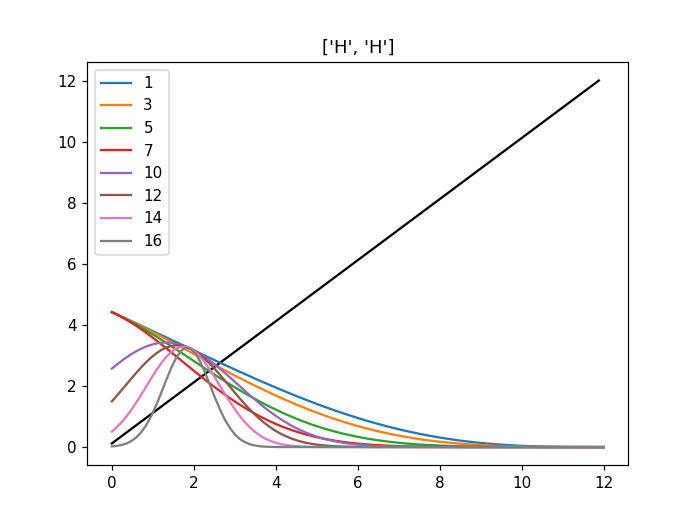

<IPython.core.display.Javascript object>


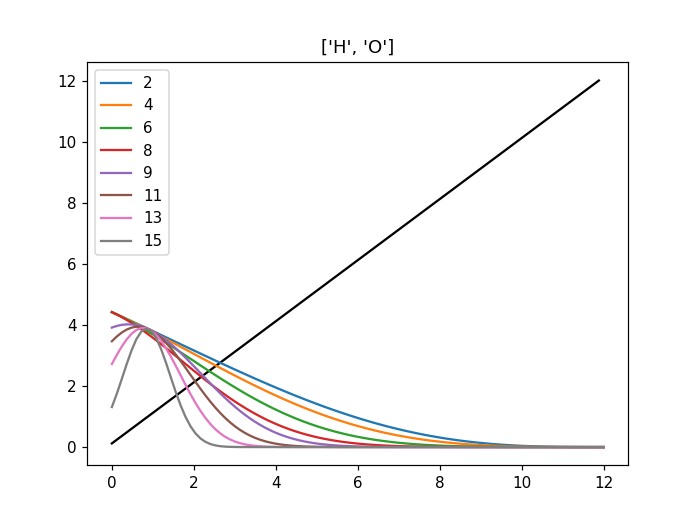

<IPython.core.display.Javascript object>


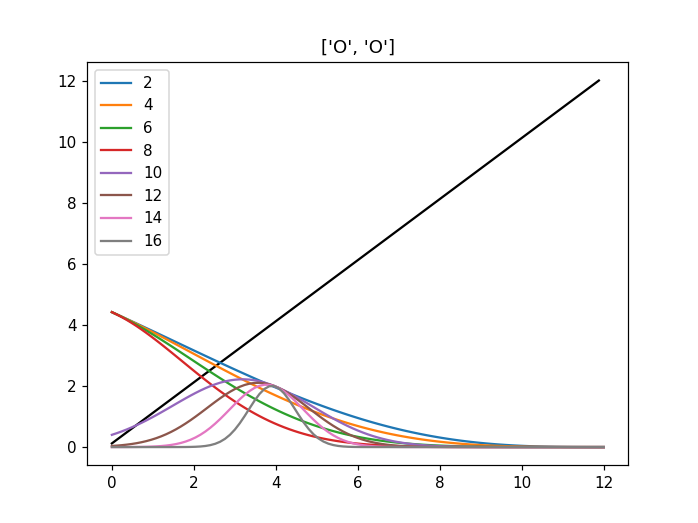

In [5]:
for c in element_combinations:
    fig, ax = plt.subplots()  
    rdf_file_name = "rdf_{0:s}_{1:s}.out".format(*c)
    rdf_data = np.loadtxt(rdf_file_name).T
    #ax.semilogy()
    #ax.set_ylim(1.E-4, 1.E0)
    ax.plot(0.rdf_data[0], rdf_data[1], 'k-')
    ec = c[0]
    e1 = c[1]  
    for sf in symmetry_functions:
        if sf.parameters["type"] == "2" and sf.parameters["ec"] == ec and sf.parameters["e1"] == e1:
            ax.plot(sf.radial[0], 10*sf.radial[1], '-', label=sf.parameters["index"])
    ax.legend()
    ax.set_title(c)